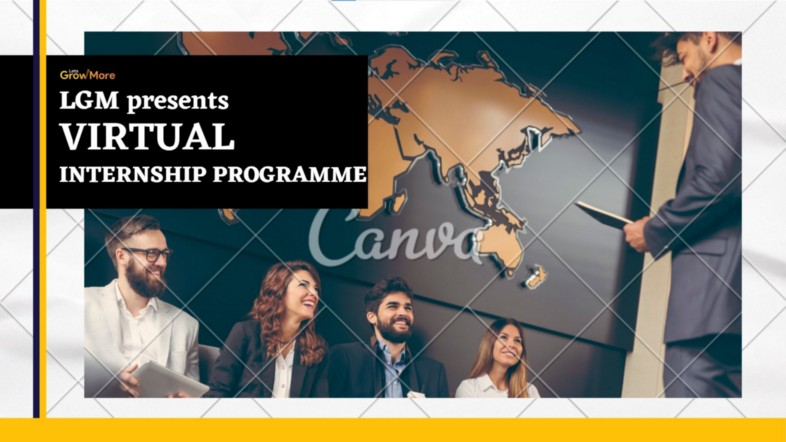

#  <center><font color="red"> Virtual Internship Program
# <center><font color="blue">Author :- Ayesha Bashir
# <center><font color="blue">Beginer Level Tasks


# Task-3 Music Recommendation

Music recommender systems can suggest songs to users based on their listening patterns.<br>
Datasetlink :- https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data

### 1. Importing The Libraries 

In [62]:
pip install recommender-system

Note: you may need to restart the kernel to use updated packages.


In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 2. Load Music Data


In [64]:
train=pd.read_csv('train.csv')
songs=pd.read_csv('songs.csv')
members=pd.read_csv('members.csv')

In [65]:
train.head()


,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [66]:

songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [67]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [68]:
#basic info
train.info()
songs.info()
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2131792 entries, 0 to 2131791
Data columns (total 6 columns):
 #   Column              Dtype  
---  ------              -----  
 0   msno                object 
 1   song_id             object 
 2   source_system_tab   object 
 3   source_screen_name  object 
 4   source_type         object 
 5   target              float64
dtypes: float64(1), object(5)
memory usage: 97.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
-

In [69]:
train.describe()

,target
count,2.131791e+06
mean,6.371624e-01
std,4.808187e-01
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+00


In [70]:
# get statistical summaries of dataset
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [71]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [72]:
train.shape

(2131792, 6)

In [73]:
songs.shape

(2296320, 7)

In [74]:
members.shape

(34403, 7)

### 3.Visulization Of The Data

<AxesSubplot:xlabel='source_system_tab', ylabel='count'>

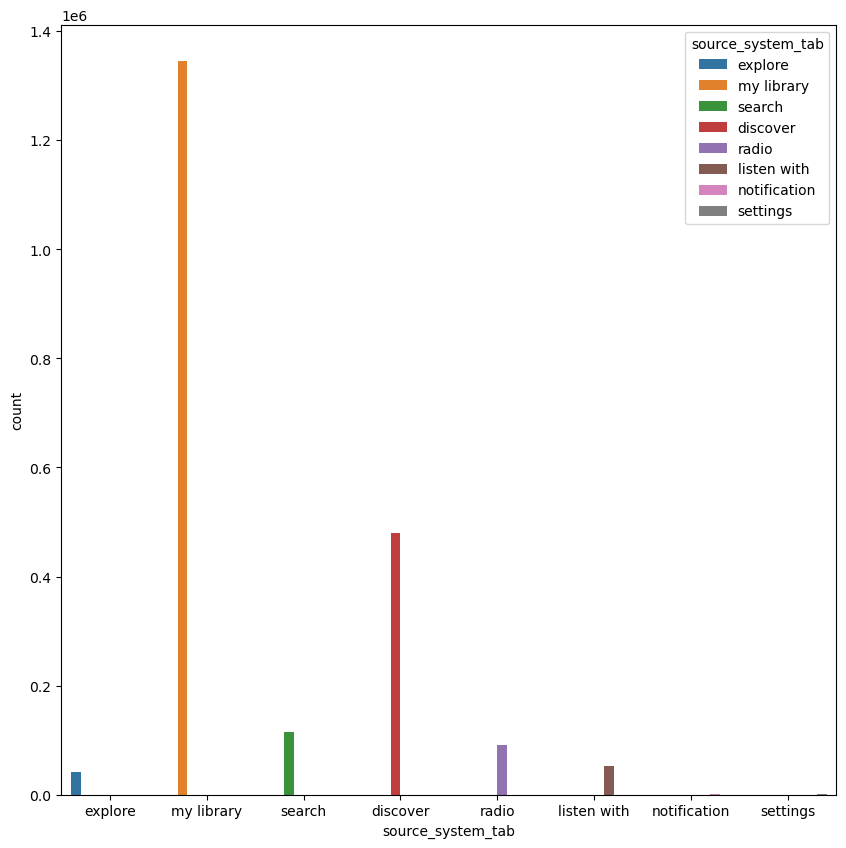

In [75]:
plt.figure(figsize=(10,10))
sns.countplot(x='source_system_tab', hue='source_system_tab', data=train)

<AxesSubplot:xlabel='source_system_tab', ylabel='count'>

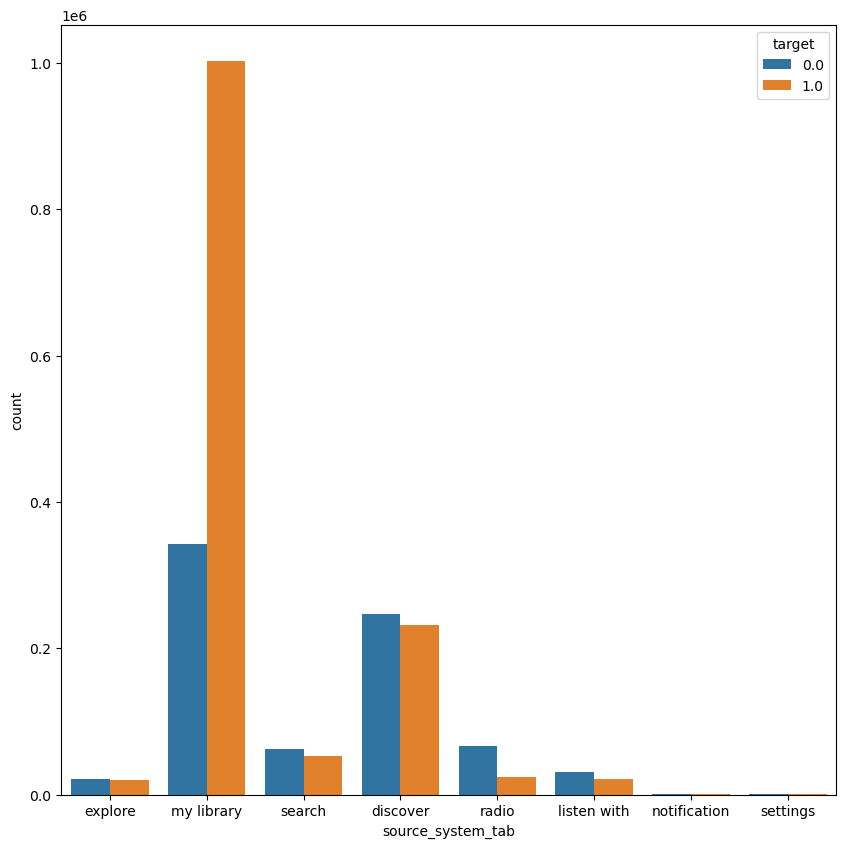

In [76]:
plt.figure(figsize=(10,10))
sns.countplot(x='source_system_tab', hue='target', data=train)

<AxesSubplot:xlabel='source_screen_name', ylabel='count'>

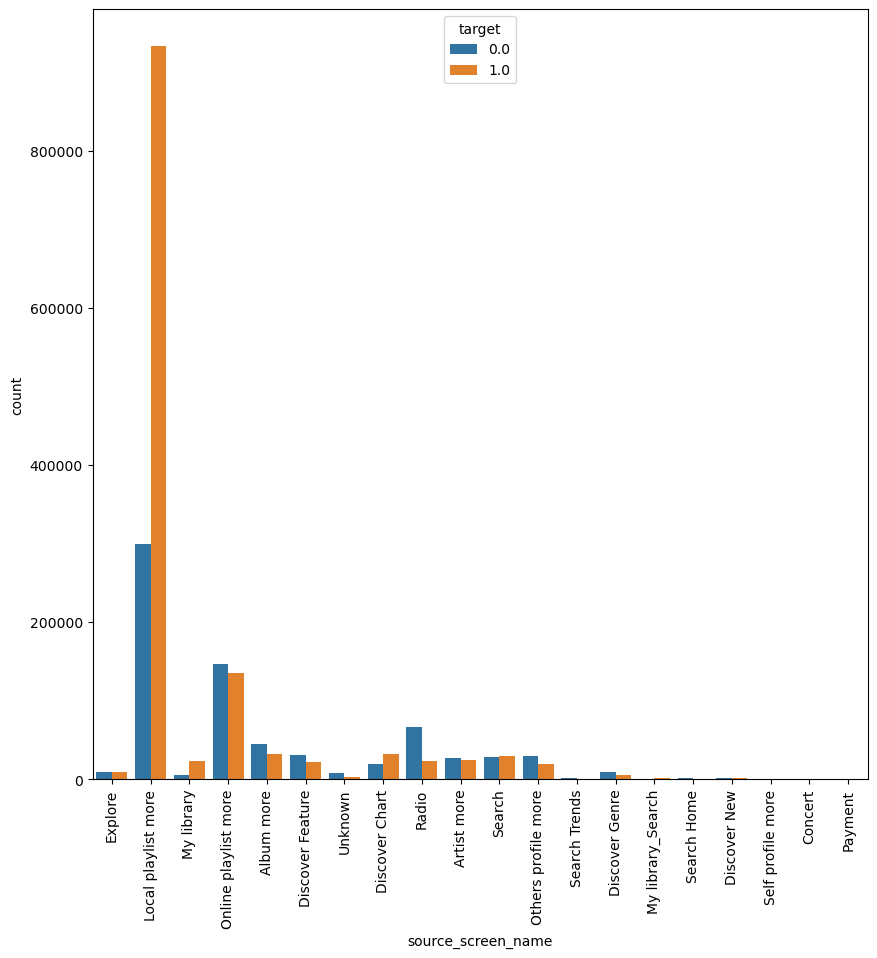

In [77]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.countplot(x='source_screen_name', hue='target',data=train)

<AxesSubplot:xlabel='source_type', ylabel='count'>

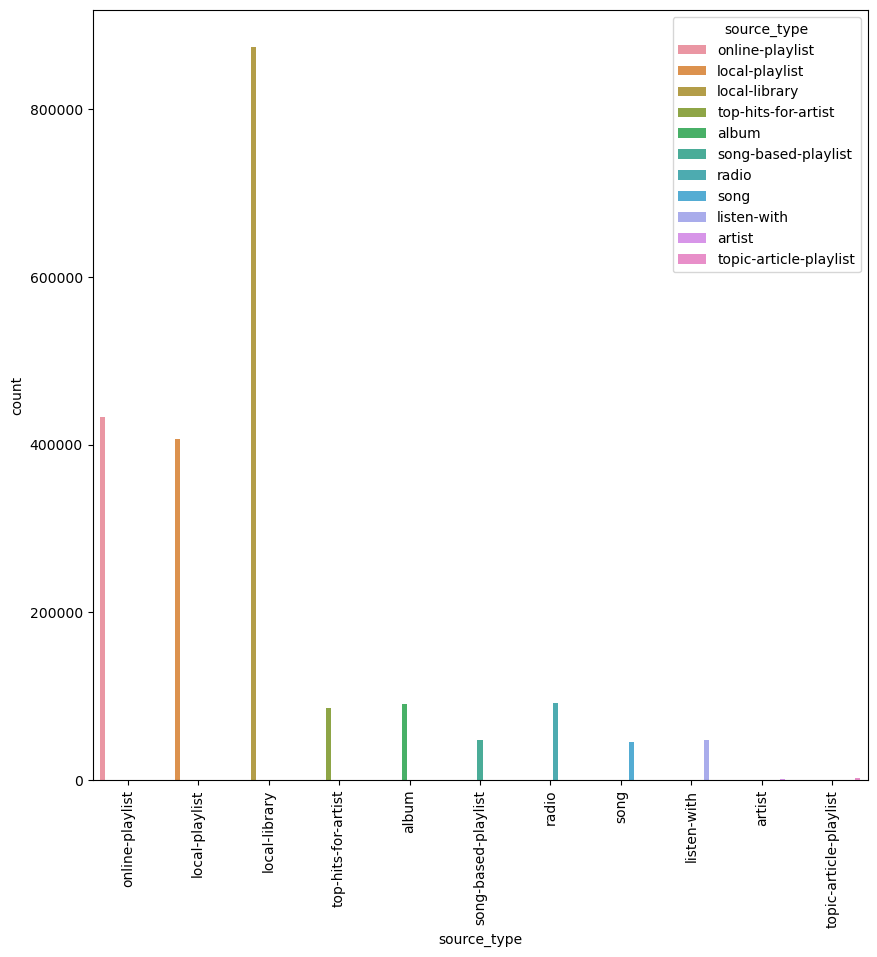

In [78]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.countplot(x='source_type', hue='source_type',data=train)

<AxesSubplot:xlabel='source_type', ylabel='count'>

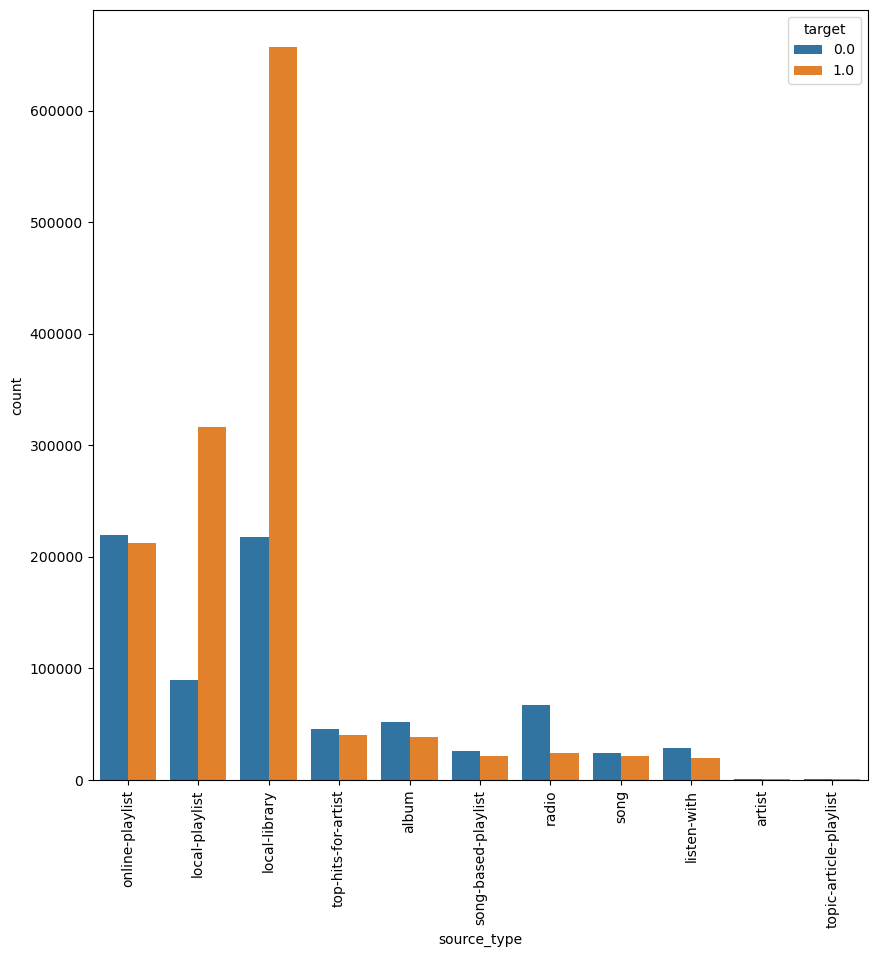

In [79]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.countplot(x='source_type', hue='target',data=train)

<AxesSubplot:xlabel='language', ylabel='count'>

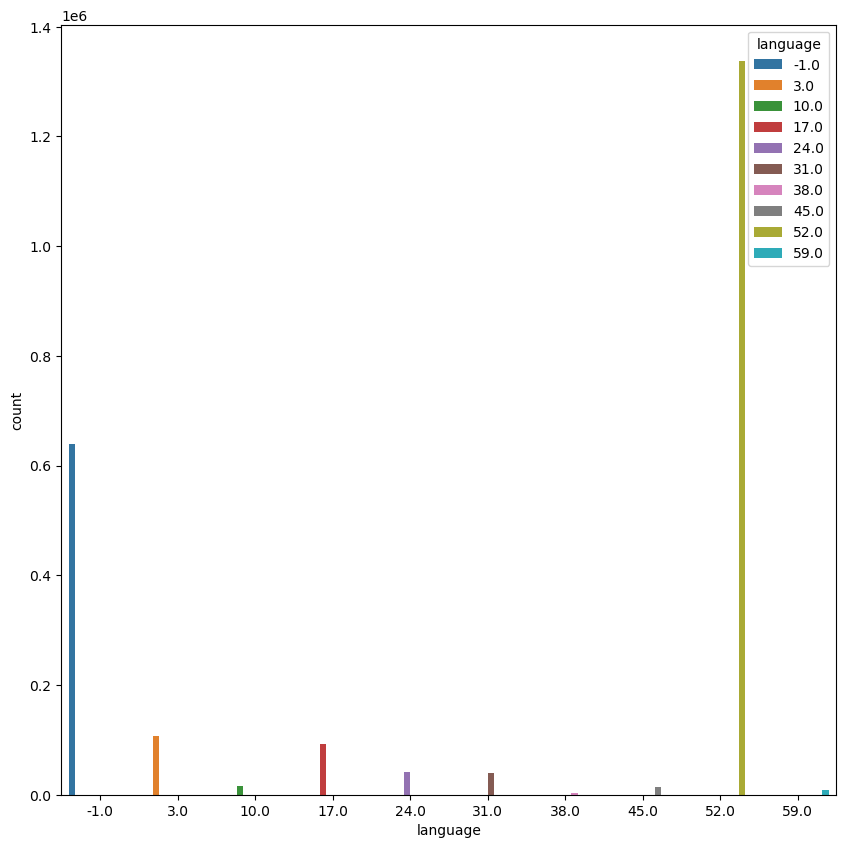

In [80]:
plt.figure(figsize=(10,10))
sns.countplot(x='language', hue='language',data=songs)

<AxesSubplot:xlabel='registered_via', ylabel='count'>

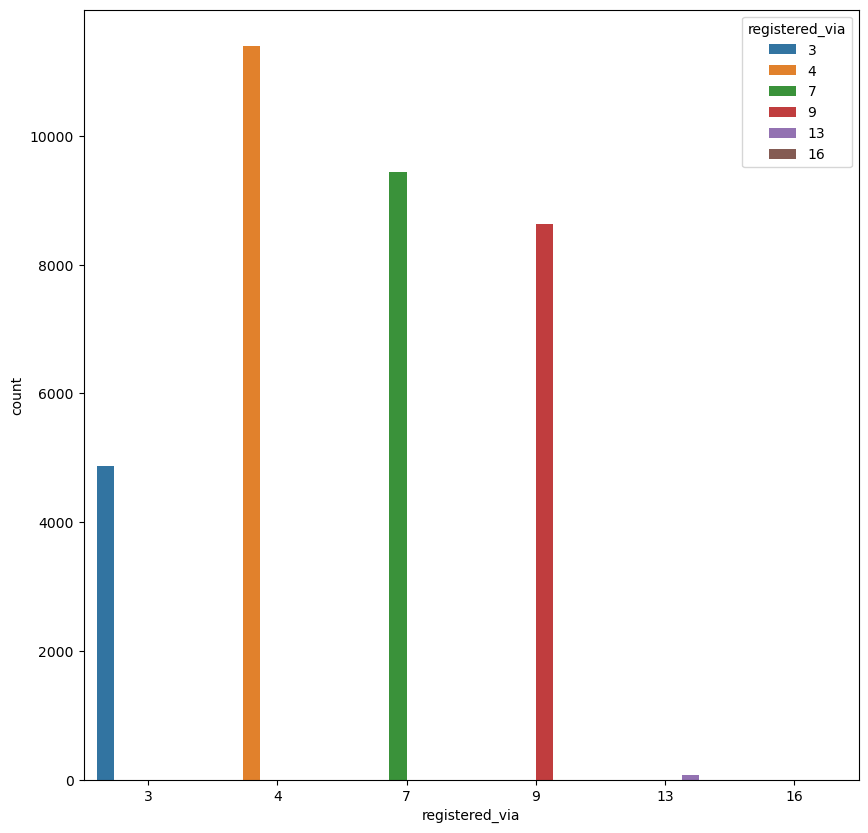

In [81]:
plt.figure(figsize=(10,10))
sns.countplot(x='registered_via', hue='registered_via',data=members)

### 4.Clean The Data

In [82]:
ntr = 7000
nts = 3000
names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test1 = pd.read_csv('train.csv',names=names,skiprows=ntr,nrows=nts)

In [83]:
test = test1.drop(['target'],axis=1)
ytr = np.array(test1['target'])

In [84]:
test_name = ['id','msno','song_id','source_system_tab','source_screen_name','source_type']
test['id']=np.arange(nts)
test = test[test_name]

In [85]:
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

In [86]:
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

In [87]:
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

In [88]:
members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')


In [89]:
train = train.fillna(-1)
test = test.fillna(-1)

In [90]:
import gc
del members, songs; gc.collect();

In [91]:
cols = list(train.columns)
cols.remove('target')

In [92]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(cols):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|██████████| 19/19 [00:17<00:00,  1.09it/s]


In [93]:
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})
train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

### 5.Build Model

In [94]:
pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 12.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [95]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

del train, test; gc.collect();

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state = 12)
    
del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid) 

watchlist = [d_train, d_valid]

In [98]:
def predict(m1_model):
    model = m1_model.fit(X_train,y_train)
    print('Training Score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_valid)
    v_test = model.predict(X_test)
    yhat = (v_test>0.5).astype(int)
    comp = (yhat==ytr).astype(int)
    acc = comp.sum()/comp.size*100
    print("Accuracy on test data for the model", acc)

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
predict(LogisticRegression())

Training Score : 0.6373023831811747
Accuracy on test data for the model 74.9


### 6.Prediction Using LightGBM

In [101]:
params = {}
params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

model1 = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist, early_stopping_rounds=10, verbose_eval=10)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.129434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Training until validation scores don't improve for 10 rounds
[10]	training's auc: 0.770338	valid_1's auc: 0.766794
[20]	training's auc: 0.793457	valid_1's auc: 0.787306
[30]	training's auc: 0.807623	valid_1's auc: 0.799589
[40]	training's auc: 0.817226	valid_1's auc: 0.8074
[50]	training's auc: 0.82649	valid_1's auc: 0.81492
[60]	training's auc: 0.834639	valid_1's auc: 0.821456
[70]	training's auc: 0.841476	valid_1's auc: 0.826961
[80]	training's auc: 0.845931	valid_1's auc: 0.830073
[90]	training's auc: 0.850029	valid_1's auc: 0.832326
[100]	training's auc: 0.853622	valid_1's auc: 0.834277
[110]	training's auc: 0.8579	valid_1's auc: 0.837173
[120]	training's auc: 0.861743	valid_1's auc: 0.839577
[130]	training's auc: 0.864769	valid_1's auc: 0.841139
[140]	trai

In [102]:
p_test = model1.predict(X_test)

In [103]:
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum()/comp.size*100
print('The accuracy of lgbm model on test data is: {0:f}%'.format(acc))

The accuracy of lgbm model on test data is: 85.733333%


# Thnak You..